# Heart Disease Risk Prediction (ML Mini Project)

## Goal
This project explores a real-world cardiovascular dataset to:
- Predict the presence of heart disease using classification models
- Practice regression modeling on clinical data
- Understand how exploratory data analysis (EDA) informs model performance

## Models Used
- Logistic Regression
- Random Forest Classifier
- Linear Regression (for continuous practice)

## Key Takeaways
- Classification models achieved strong performance (~85-88% accuracy)
- Chest pain type (cp), age, and cholesterol showed meaningful association with heart disease
- Regression performance was weak, highlighting the importance of selecting appropriate prediction targets

In [1]:
import pandas as pd 
import numpy as np

In [3]:
df = pd.read_csv('/Users/harmonyedgley/Downloads/heart+disease/processed.cleveland.data', header=None, na_values='?')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
df.shape

(303, 14)

In [6]:
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    4
12    2
13    0
dtype: int64

In [7]:
# Assign column names

df_columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df.columns = df_columns

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [10]:
df['num'].value_counts()

num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

In [11]:
# Create binary classification target for [num]
df['heart_disease'] = (df['num'] > 0).astype(int)

In [12]:
df[['num', 'heart_disease']].head()

,num,heart_disease
0,0,0
1,2,1
2,1,1
3,0,0
4,0,0


In [13]:
df['heart_disease'].value_counts()

heart_disease
0    164
1    139
Name: count, dtype: int64

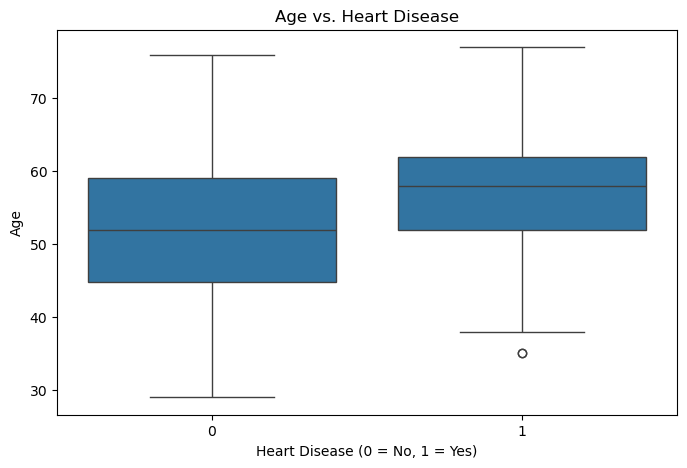

In [14]:
# EDA 
import seaborn as sns
import matplotlib.pyplot as plt

# Create boxplot using seaborn.boxplot()
plt.figure(figsize=(8,5)) # adjusting figure size
sns.boxplot(x='heart_disease', y='age', data=df)


# Titles and labels
plt.title('Age vs. Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Age')

# Display 
plt.show()

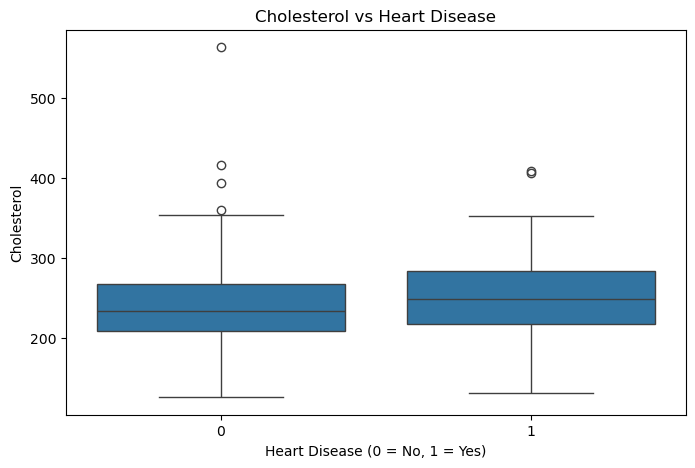

In [15]:
# EDA Plot 2 - Cholesterol vs Heart Disease

plt.figure(figsize=(8,5))
sns.boxplot(x='heart_disease', y='chol', data=df)

plt.title('Cholesterol vs Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Cholesterol')

plt.show()

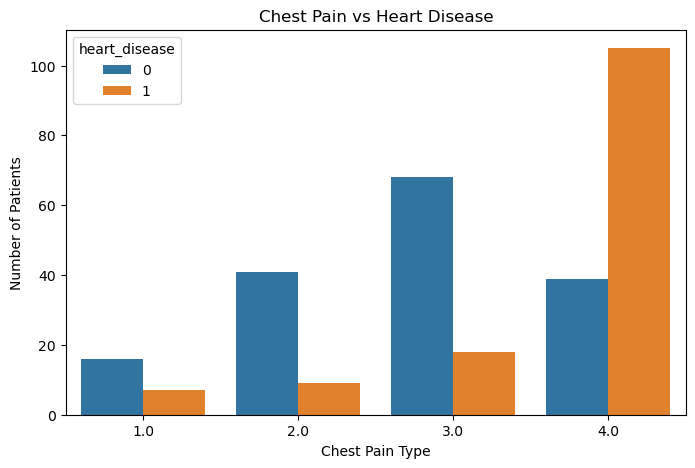

In [16]:
# EDA Plot 3 - Chest Pain Type vs Heart Disease

plt.figure(figsize=(8,5))
sns.countplot(x='cp', hue='heart_disease', data=df)

plt.title('Chest Pain vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Number of Patients')

plt.show()

### Interpretation 

The countplot shows a strong association between chest pain type and heart disease presence. Patients in the highest chest pain category (asymptomatic) appear far more frequently among those with heart disease, while lower chest pain categories are more commonly observed in patients without heart disease. This suggests that chest pain type is an important indicator of heart disease presence, although further modeling is required to quantify its predictive strength.

In [ ]:
# Prep for Logistic Regression Model 1: Fill Missing Values

In [17]:
df['ca'] = df['ca'].fillna(df['ca'].median())
df['thal'] = df['thal'].fillna(df['thal'].median())

In [18]:
df[['ca', 'thal']].isna().sum()

ca      0
thal    0
dtype: int64

In [19]:
# Prep for Logistic Regression Model 2: Identify Categorical vs Numerical

In [21]:
# One-Hot Encode Categoricals

categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [22]:
df_encoded.isna().sum().sum()

np.int64(0)

In [23]:
df_encoded.head()

,age,trestbps,chol,thalach,oldpeak,ca,num,heart_disease,sex_1.0,cp_2.0,cp_3.0,cp_4.0,fbs_1.0,restecg_1.0,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0
0,63.0,145.0,233.0,150.0,2.3,0.0,0,0,True,False,False,False,True,False,True,False,False,True,True,False
1,67.0,160.0,286.0,108.0,1.5,3.0,2,1,True,False,False,True,False,False,True,True,True,False,False,False
2,67.0,120.0,229.0,129.0,2.6,2.0,1,1,True,False,False,True,False,False,True,True,True,False,False,True
3,37.0,130.0,250.0,187.0,3.5,0.0,0,0,True,False,True,False,False,False,False,False,False,True,False,False
4,41.0,130.0,204.0,172.0,1.4,0.0,0,0,False,True,False,False,False,False,True,False,False,False,False,False


### Classification Modeling 

In [25]:
# Define X and y
X = df_encoded.drop(columns=['num', 'heart_disease'])
y = df_encoded['heart_disease']

In [27]:
# Train/Test Split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the results to see the split:
print(f"X_train (80%):\n{X_train}")
print(f"X_test (20%):\n{X_test}")
print(f"y_train (80%):\n{y_train}")
print(f"y_test (20%):\n{y_test}")

X_train (80%):
      age  trestbps   chol  thalach  oldpeak   ca  sex_1.0  cp_2.0  cp_3.0  \
180  48.0     124.0  274.0    166.0      0.5  0.0     True   False   False   
208  55.0     130.0  262.0    155.0      0.0  0.0     True    True   False   
167  54.0     132.0  288.0    159.0      0.0  1.0    False    True   False   
105  54.0     108.0  309.0    156.0      0.0  0.0     True    True   False   
297  57.0     140.0  241.0    123.0      0.2  0.0    False   False   False   
..    ...       ...    ...      ...      ...  ...      ...     ...     ...   
173  62.0     140.0  394.0    157.0      1.2  0.0    False   False   False   
136  70.0     145.0  174.0    125.0      2.6  0.0     True   False   False   
2    67.0     120.0  229.0    129.0      2.6  2.0     True   False   False   
189  69.0     140.0  254.0    146.0      2.0  3.0     True   False    True   
16   48.0     110.0  229.0    168.0      1.0  0.0     True    True   False   

     cp_4.0  fbs_1.0  restecg_1.0  restecg_2.0  

In [30]:
# Train Logistic Regression
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=10000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [32]:
y_pred = log_model.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1])

In [33]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8524590163934426

### Confusion Matrix 
This will provide us with:
- True Positives
- False Negatives
- False Positives
- True Negatives

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[27  6]
 [ 3 25]]


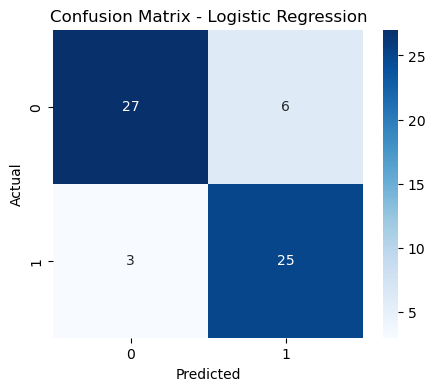

In [36]:
# Visuals

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

### Interpretation:
The model correctly identifies most patients with and without heart disease, with relatively few false negatives. While some healthy patients are incorrectly classified as having heart disease, the model prioritizes detecting disease cases, which is generally preferable in a healthcare screening context. 

### Random Forest Classifier 

In [37]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [39]:
y_pred_rf = rf_model.predict(X_test)
y_pred_rf

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1])

In [41]:
from sklearn.metrics import accuracy_score

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_accuracy

0.8852459016393442

### Regression Model 
- Target(y): age
- Predictors(X): clinical features 

In [44]:
# Define X and y
X_reg = df_encoded.drop(columns=['age', 'num', 'heart_disease'])
y_reg = df_encoded['age']

In [45]:
# Train/Test Split

from sklearn.model_selection import train_test_split

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [47]:
# Train Linear Regression Model
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression()

reg_model.fit(X_train_reg, y_train_reg)

LinearRegression()

In [50]:
y_pred_reg = reg_model.predict(X_test_reg)

### Evaluate Regression Model

In [53]:
from sklearn.metrics import mean_squared_error, r2_score

reg_mse = mean_squared_error(y_test_reg, y_pred_reg)
reg_r2 = r2_score(y_test_reg, y_pred_reg)

reg_mse, reg_r2

(70.56495494102832, 0.045358637999307616)

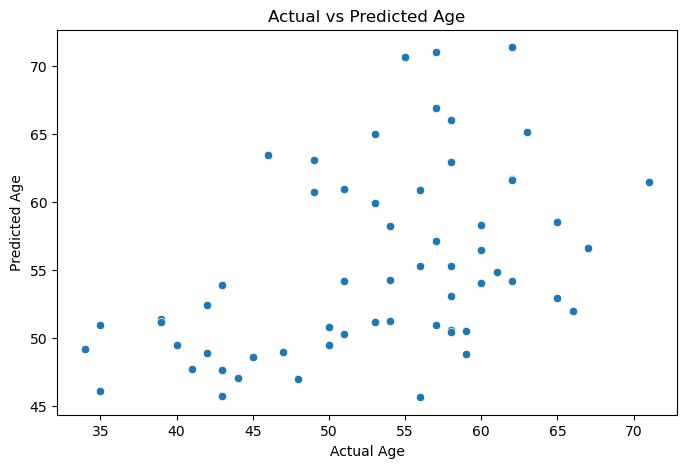

In [54]:
### Visualization 

plt.figure(figsize=(8,5))

sns.scatterplot(x=y_test_reg, y=y_pred_reg)
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("Actual vs Predicted Age")
plt.show()